In [1]:
from global_variable import *

In [83]:
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt
import ast
import numpy as np
import operator

In [3]:
# with open('4pdpwith9sensor.txt', 'r') as f:
#     sensor = ast.literal_eval(f.read())


In [4]:
with open('sensornew.txt', 'r') as f:
    sensor = ast.literal_eval(f.read())

this class is created to position the sensors randomly in the range of 0-500

In [5]:
# class SensorNode():
#     posX=0
#     posY=0
#     data_rate=data_rate
#     transmission_range=transmission_range

#     def __init__(self):
#         self.posX
#         self.posY
#         self.data_rate
#         self.transmission_range
    
#     def get_pose_node(self):
#         self.posX=random.randrange(length_of_grid)
#         self.posY=random.randrange(length_of_grid)
#         self.data_rate
#         self.transmission_range
#         return self.posX,self.posY

a list of sensor is created in which sensor position objects are stored

In [6]:
#  sensor=[]

objject of class SensorNode is created and stored below

In [7]:
# for i in range(number_of_sensor):
#    sensor.append(SensorNode().get_pose_node())

In [8]:
 sensor=sorted(sensor)

This function calulate the possible drone positions (pdp) in the grid which is of size 500x500

In [9]:
def calculate_Pdp_positions(length_of_grid,transmission_range):
    pdp_positions={}
    k=0
    for c_1 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
        for c_2 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
            pdp_positions[k]=(c_1*transmission_range*math.sqrt(2),c_2*transmission_range*math.sqrt(2))
            k=k+1
    return pdp_positions

In [10]:
pdp_positions=calculate_Pdp_positions(length_of_grid,transmission_range)

Here we are creating a trip  graph between possible drone positions (pdp)

In [11]:
def distance(points,i,j):
    x=points[i][0]-points[j][0]
    y=points[i][1]-points[j][1]
    return math.sqrt(x*x+y*y)

In [12]:
def create_trip_graph():
    G=nx.Graph()
    distance_between_pdp={}
    for i in range(len(pdp_positions)):
        G.add_node('pdp{}'.format(i),pos=pdp_positions[i])
    for u in range(len(pdp_positions)):
        for v in range(len(pdp_positions)):
            wt=distance(pdp_positions,u,v)
            G.add_edge('pdp{}'.format(u),'pdp{}'.format(v),weight=wt)
            distance_between_pdp[(u,v)]=wt
    return G,distance_between_pdp

In [13]:
trip_graph,distance_between_pdp=create_trip_graph()

In [14]:
distance_between_pdp


{(0, 0): 0.0,
 (0, 1): 141.4213562373095,
 (0, 2): 282.842712474619,
 (0, 3): 424.26406871192853,
 (0, 4): 141.4213562373095,
 (0, 5): 200.0,
 (0, 6): 316.22776601683796,
 (0, 7): 447.21359549995793,
 (0, 8): 282.842712474619,
 (0, 9): 316.22776601683796,
 (0, 10): 400.0,
 (0, 11): 509.9019513592785,
 (0, 12): 424.26406871192853,
 (0, 13): 447.21359549995793,
 (0, 14): 509.9019513592785,
 (0, 15): 600.0,
 (1, 0): 141.4213562373095,
 (1, 1): 0.0,
 (1, 2): 141.4213562373095,
 (1, 3): 282.842712474619,
 (1, 4): 200.0,
 (1, 5): 141.4213562373095,
 (1, 6): 200.0,
 (1, 7): 316.22776601683796,
 (1, 8): 316.22776601683796,
 (1, 9): 282.842712474619,
 (1, 10): 316.22776601683796,
 (1, 11): 400.0,
 (1, 12): 447.21359549995793,
 (1, 13): 424.26406871192853,
 (1, 14): 447.21359549995793,
 (1, 15): 509.9019513592785,
 (2, 0): 282.842712474619,
 (2, 1): 141.4213562373095,
 (2, 2): 0.0,
 (2, 3): 141.4213562373095,
 (2, 4): 316.22776601683796,
 (2, 5): 200.0,
 (2, 6): 141.4213562373095,
 (2, 7): 200.0

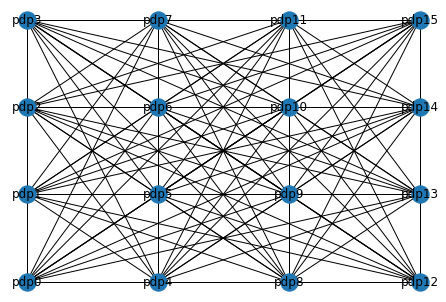

In [15]:
nx.draw(trip_graph,nx.get_node_attributes(trip_graph,'pos'),with_labels=True)

A scatter plot just to see the positions of pdp and sensors

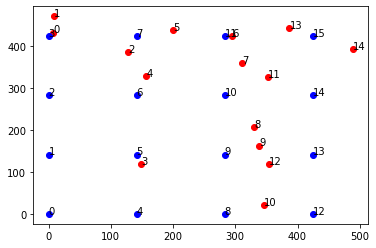

In [16]:
for i in range(len(sensor)):
    plt.scatter(sensor[i][0],sensor[i][1],c='r')
    plt.annotate(i,(sensor[i][0],sensor[i][1]))
for j in range(len(pdp_positions)):
    plt.scatter(pdp_positions[j][0],pdp_positions[j][1],c='b')
    plt.annotate(j,(pdp_positions[j][0],pdp_positions[j][1]))

A directed graph is created from networkx library

In [17]:
K=nx.DiGraph()

sensor nodes are placed in the graph

In [18]:
for i in range(len(sensor)):
    K.add_node('sensor{}'.format(i),pos=sensor[i])

here the euclidean distance between each sensor is calculated and edge is assigned between each sensor 
.Also the edge weight is assigned to 1 if the euclidean distance is less than the transmission range 

In [19]:
def calulate_distance_between_each_sensors_and_assign_weight(points,K):
    distance_sensors={}
    M=K
    k=0
    edge_weight=1
    for i in range(len(points)):
        for j in range(len(points)):
            euclidean_distance=distance(points,i,j)
            if i!=j:
                #M.add_edge("sensor{}".format(i),"sensor{}".format(j))

                
                if euclidean_distance<=transmission_range:
                    #if M.has_edge('sensor{}'.format(i),'sensor{}'.format(j))!=True:
                    M.add_edge("sensor{}".format(i),"sensor{}".format(j))

                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=1

                    distance_sensors[i,j]=(euclidean_distance,edge_weight)
#                 else:
#                     M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=100
#                     distance_sensors[i,j]=(euclidean_distance,100)
#             k=k+1
    return distance_sensors,M

In [20]:
euclidean_distance_between_sensor,L=calulate_distance_between_each_sensors_and_assign_weight(sensor,K)

In [21]:
euclidean_distance_between_sensor

{(0, 1): (39.01281840626232, 1),
 (1, 0): (39.01281840626232, 1),
 (2, 4): (63.953107821277925, 1),
 (2, 5): (89.40357934669059, 1),
 (4, 2): (63.953107821277925, 1),
 (5, 2): (89.40357934669059, 1),
 (5, 6): (96.17692030835673, 1),
 (6, 5): (96.17692030835673, 1),
 (6, 7): (66.94027188471824, 1),
 (6, 13): (93.74433316206373, 1),
 (7, 6): (66.94027188471824, 1),
 (7, 11): (52.80151512977634, 1),
 (8, 9): (44.721359549995796, 1),
 (8, 12): (91.21403400793103, 1),
 (9, 8): (44.721359549995796, 1),
 (9, 12): (46.8187996428785, 1),
 (10, 12): (97.32933781753577, 1),
 (11, 7): (52.80151512977634, 1),
 (12, 8): (91.21403400793103, 1),
 (12, 9): (46.8187996428785, 1),
 (12, 10): (97.32933781753577, 1),
 (13, 6): (93.74433316206373, 1)}

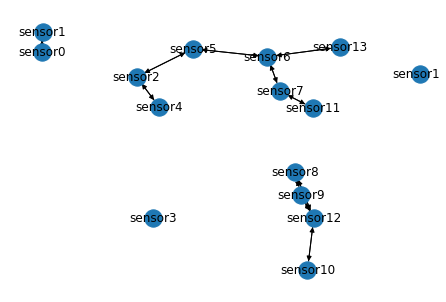

In [22]:
nx.draw(L,nx.get_node_attributes(L,'pos'),with_labels=True)

function to calculate euclidean distance between sensor and pdps

In [23]:
def distance_pdp_sensors(pdp_positions,sensor,u,v):
    x=pdp_positions[u][0]-sensor[v][0]
    y=pdp_positions[u][1]-sensor[v][1]
    return math.sqrt(x*x+y*y)

function to check euclidean distance between sensor node and pdp nodes.After that edge weight is assigned.
Also the edge is added between each pdp node  to all the sensor nodes.So this function can be also known as connectivity graph between sensor node and pdps

In [24]:
def connectivity_graph(pdp_positions,sensor,K):
    J=K
    distance_pdp_each_sensor={}
    k=0
    weight=1
    for i in range(len(pdp_positions)):
        J.add_node('pdp{}'.format(i),pos=pdp_positions[i])
    for u in range(len(pdp_positions)):
        for v in range(len(sensor)):
            euclidean_distance_between_pdp_sensor=distance_pdp_sensors(pdp_positions,sensor,u,v)
            J.add_edge("pdp{}".format(u),"sensor{}".format(v))
            
            if euclidean_distance_between_pdp_sensor<=transmission_range:
                #J.add_edge("pdp{}".format(u),"sensor{}".format(v))
                #if J.has_edge('pdp{}'.format(i),'sensor{}'.format(j))!=True:
                    #J.add_edge("pdp{}".format(u),"sensor{}".format(v))
               
                
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=1
                distance_pdp_each_sensor[u,v]=euclidean_distance_between_pdp_sensor,weight
            else:
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=100
                distance_pdp_each_sensor[u,v]=euclidean_distance_between_pdp_sensor,100
#            k=k+1
    return distance_pdp_each_sensor,J

In [25]:
distance_between_pdp_to_each_sensor,N=connectivity_graph(pdp_positions,sensor,L)

In [26]:
distance_between_pdp_to_each_sensor

{(0, 0): (432.0567092408125, 100),
 (0, 1): (471.0679356525978, 100),
 (0, 2): (406.6693988979254, 100),
 (0, 3): (190.68822721919673, 100),
 (0, 4): (364.5408070436011, 100),
 (0, 5): (482.4116499422459, 100),
 (0, 6): (516.5278308087571, 100),
 (0, 7): (474.9757888566532, 100),
 (0, 8): (389.5497400846264, 100),
 (0, 9): (375.2505829442507, 100),
 (0, 10): (346.69871646719434, 100),
 (0, 11): (481.1839565072801, 100),
 (0, 12): (373.46619659615783, 100),
 (0, 13): (587.4802124327252, 100),
 (0, 14): (626.7256177945816, 100),
 (1, 0): (290.6629460577399, 100),
 (1, 1): (329.67572313480173, 100),
 (1, 2): (276.048388846588, 100),
 (1, 3): (150.6775272411926, 100),
 (1, 4): (244.6114216381777, 100),
 (1, 5): (358.5429531083302, 100),
 (1, 6): (408.5042103953906, 100),
 (1, 7): (379.5542994376585, 100),
 (1, 8): (336.45290683504857, 100),
 (1, 9): (338.68811296919927, 100),
 (1, 10): (366.029316210544, 100),
 (1, 11): (398.8087674823606, 100),
 (1, 12): (354.70934187799503, 100),
 (1, 13

In [27]:
colormap=[]
for i,j in N.nodes.data():
    for m,n in j.items():
        if n in sensor:
            colormap.append('b')
        else:
            colormap.append('r')

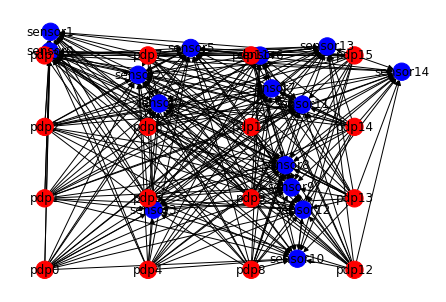

In [28]:
nx.draw(N,nx.get_node_attributes(N, 'pos'),with_labels=True,node_color=colormap)


In [29]:
N.edges(data=True)

OutEdgeDataView([('sensor0', 'sensor1', {'weight': 1}), ('sensor1', 'sensor0', {'weight': 1}), ('sensor2', 'sensor4', {'weight': 1}), ('sensor2', 'sensor5', {'weight': 1}), ('sensor4', 'sensor2', {'weight': 1}), ('sensor5', 'sensor2', {'weight': 1}), ('sensor5', 'sensor6', {'weight': 1}), ('sensor6', 'sensor5', {'weight': 1}), ('sensor6', 'sensor7', {'weight': 1}), ('sensor6', 'sensor13', {'weight': 1}), ('sensor7', 'sensor6', {'weight': 1}), ('sensor7', 'sensor11', {'weight': 1}), ('sensor8', 'sensor9', {'weight': 1}), ('sensor8', 'sensor12', {'weight': 1}), ('sensor9', 'sensor8', {'weight': 1}), ('sensor9', 'sensor12', {'weight': 1}), ('sensor10', 'sensor12', {'weight': 1}), ('sensor11', 'sensor7', {'weight': 1}), ('sensor12', 'sensor8', {'weight': 1}), ('sensor12', 'sensor9', {'weight': 1}), ('sensor12', 'sensor10', {'weight': 1}), ('sensor13', 'sensor6', {'weight': 1}), ('pdp0', 'sensor0', {'weight': 100}), ('pdp0', 'sensor1', {'weight': 100}), ('pdp0', 'sensor2', {'weight': 100}),

Here the shortest path between each pdp to each sensor node is calculated.Also the path weight is assigned too.

In [30]:
k=0
arc_length={}
shortest_path={}
for i in range(len(pdp_positions)):
    for j in range(len(sensor)):
        if N.has_edge('pdp{}'.format(i),'sensor{}'.format(j)):
            shortest_path[i,j]=nx.shortest_path(N,source='pdp{}'.format(i),target='sensor{}'.format(j),
                                              weight='weight',method='dijkstra')
            arc_length[i,j]=nx.dijkstra_path_length(N,'pdp{}'.format(i),'sensor{}'.format(j))
            
           
        else:
            shortest_path[i,j]=0
        #k=k+1

In [31]:
shortest_path

{(0, 0): ['pdp0', 'sensor0'],
 (0, 1): ['pdp0', 'sensor1'],
 (0, 2): ['pdp0', 'sensor2'],
 (0, 3): ['pdp0', 'sensor3'],
 (0, 4): ['pdp0', 'sensor4'],
 (0, 5): ['pdp0', 'sensor5'],
 (0, 6): ['pdp0', 'sensor6'],
 (0, 7): ['pdp0', 'sensor7'],
 (0, 8): ['pdp0', 'sensor8'],
 (0, 9): ['pdp0', 'sensor9'],
 (0, 10): ['pdp0', 'sensor10'],
 (0, 11): ['pdp0', 'sensor11'],
 (0, 12): ['pdp0', 'sensor12'],
 (0, 13): ['pdp0', 'sensor13'],
 (0, 14): ['pdp0', 'sensor14'],
 (1, 0): ['pdp1', 'sensor0'],
 (1, 1): ['pdp1', 'sensor1'],
 (1, 2): ['pdp1', 'sensor2'],
 (1, 3): ['pdp1', 'sensor3'],
 (1, 4): ['pdp1', 'sensor4'],
 (1, 5): ['pdp1', 'sensor5'],
 (1, 6): ['pdp1', 'sensor6'],
 (1, 7): ['pdp1', 'sensor7'],
 (1, 8): ['pdp1', 'sensor8'],
 (1, 9): ['pdp1', 'sensor9'],
 (1, 10): ['pdp1', 'sensor10'],
 (1, 11): ['pdp1', 'sensor11'],
 (1, 12): ['pdp1', 'sensor12'],
 (1, 13): ['pdp1', 'sensor13'],
 (1, 14): ['pdp1', 'sensor14'],
 (2, 0): ['pdp2', 'sensor0'],
 (2, 1): ['pdp2', 'sensor1'],
 (2, 2): ['pdp2', 's

In [32]:
arc_length

{(0, 0): 100,
 (0, 1): 100,
 (0, 2): 100,
 (0, 3): 100,
 (0, 4): 100,
 (0, 5): 100,
 (0, 6): 100,
 (0, 7): 100,
 (0, 8): 100,
 (0, 9): 100,
 (0, 10): 100,
 (0, 11): 100,
 (0, 12): 100,
 (0, 13): 100,
 (0, 14): 100,
 (1, 0): 100,
 (1, 1): 100,
 (1, 2): 100,
 (1, 3): 100,
 (1, 4): 100,
 (1, 5): 100,
 (1, 6): 100,
 (1, 7): 100,
 (1, 8): 100,
 (1, 9): 100,
 (1, 10): 100,
 (1, 11): 100,
 (1, 12): 100,
 (1, 13): 100,
 (1, 14): 100,
 (2, 0): 100,
 (2, 1): 100,
 (2, 2): 100,
 (2, 3): 100,
 (2, 4): 100,
 (2, 5): 100,
 (2, 6): 100,
 (2, 7): 100,
 (2, 8): 100,
 (2, 9): 100,
 (2, 10): 100,
 (2, 11): 100,
 (2, 12): 100,
 (2, 13): 100,
 (2, 14): 100,
 (3, 0): 1,
 (3, 1): 1,
 (3, 2): 100,
 (3, 3): 100,
 (3, 4): 100,
 (3, 5): 100,
 (3, 6): 100,
 (3, 7): 100,
 (3, 8): 100,
 (3, 9): 100,
 (3, 10): 100,
 (3, 11): 100,
 (3, 12): 100,
 (3, 13): 100,
 (3, 14): 100,
 (4, 0): 100,
 (4, 1): 100,
 (4, 2): 100,
 (4, 3): 100,
 (4, 4): 100,
 (4, 5): 100,
 (4, 6): 100,
 (4, 7): 100,
 (4, 8): 100,
 (4, 9): 100,
 (4,

to assign the path lenght to the shortest path between pdp to sensor so the values are zipped below

In [33]:
new_zipped=dict(zip(arc_length.items(),shortest_path.values()))

In [34]:
new_zipped

{((0, 0), 100): ['pdp0', 'sensor0'],
 ((0, 1), 100): ['pdp0', 'sensor1'],
 ((0, 2), 100): ['pdp0', 'sensor2'],
 ((0, 3), 100): ['pdp0', 'sensor3'],
 ((0, 4), 100): ['pdp0', 'sensor4'],
 ((0, 5), 100): ['pdp0', 'sensor5'],
 ((0, 6), 100): ['pdp0', 'sensor6'],
 ((0, 7), 100): ['pdp0', 'sensor7'],
 ((0, 8), 100): ['pdp0', 'sensor8'],
 ((0, 9), 100): ['pdp0', 'sensor9'],
 ((0, 10), 100): ['pdp0', 'sensor10'],
 ((0, 11), 100): ['pdp0', 'sensor11'],
 ((0, 12), 100): ['pdp0', 'sensor12'],
 ((0, 13), 100): ['pdp0', 'sensor13'],
 ((0, 14), 100): ['pdp0', 'sensor14'],
 ((1, 0), 100): ['pdp1', 'sensor0'],
 ((1, 1), 100): ['pdp1', 'sensor1'],
 ((1, 2), 100): ['pdp1', 'sensor2'],
 ((1, 3), 100): ['pdp1', 'sensor3'],
 ((1, 4), 100): ['pdp1', 'sensor4'],
 ((1, 5), 100): ['pdp1', 'sensor5'],
 ((1, 6), 100): ['pdp1', 'sensor6'],
 ((1, 7), 100): ['pdp1', 'sensor7'],
 ((1, 8), 100): ['pdp1', 'sensor8'],
 ((1, 9), 100): ['pdp1', 'sensor9'],
 ((1, 10), 100): ['pdp1', 'sensor10'],
 ((1, 11), 100): ['pdp1', 

Here to calculate the weight for each pdp we need to group the path length of the shortest distance between the pdp 
and sensor which is also known as hop.
Since dijkstra algorithm is giving the shortest length with path length having weights =100 so we are replacing them with 0

In [35]:
from collections import defaultdict
values32=defaultdict(list)
for j in range(len(pdp_positions)):
    
    for k,v in new_zipped.items():
        if k[0][0]==j:
            if k[1]!=100:
                values32[j].append(k[1])
            else:
                values32[j].append(0)
                
        
    

In [36]:
values32

defaultdict(list,
            {0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             3: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             5: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             6: [0, 0, 2, 0, 1, 3, 4, 5, 0, 0, 0, 6, 0, 5, 0],
             7: [0, 0, 1, 0, 1, 1, 2, 3, 0, 0, 0, 4, 0, 3, 0],
             8: [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 2, 0, 0],
             9: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0],
             10: [0, 0, 4, 0, 5, 3, 2, 1, 1, 2, 3, 1, 2, 3, 0],
             11: [0, 0, 2, 0, 3, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0],
             12: [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 2, 0, 0],
             13: [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0],
             14: [0, 0, 5, 0, 6, 4, 3, 2, 0, 0, 0, 1, 0, 4, 0],
             15: [0, 0, 4, 0, 5,

here we are counting the unique values in the list 

In [37]:
values1={}
counts={}
for keys,val in values32.items():
    values1[keys],counts[keys]=np.unique(val, return_counts=True)

In [38]:
values1

{0: array([0]),
 1: array([0]),
 2: array([0]),
 3: array([0, 1]),
 4: array([0]),
 5: array([0, 1]),
 6: array([0, 1, 2, 3, 4, 5, 6]),
 7: array([0, 1, 2, 3, 4]),
 8: array([0, 1, 2, 3]),
 9: array([0, 1, 2]),
 10: array([0, 1, 2, 3, 4, 5]),
 11: array([0, 1, 2, 3]),
 12: array([0, 1, 2, 3]),
 13: array([0, 1, 2]),
 14: array([0, 1, 2, 3, 4, 5, 6]),
 15: array([0, 1, 2, 3, 4, 5])}

In [39]:
counts

{0: array([15], dtype=int64),
 1: array([15], dtype=int64),
 2: array([15], dtype=int64),
 3: array([13,  2], dtype=int64),
 4: array([15], dtype=int64),
 5: array([14,  1], dtype=int64),
 6: array([8, 1, 1, 1, 1, 2, 1], dtype=int64),
 7: array([8, 3, 1, 2, 1], dtype=int64),
 8: array([11,  1,  1,  2], dtype=int64),
 9: array([11,  3,  1], dtype=int64),
 10: array([4, 3, 3, 3, 1, 1], dtype=int64),
 11: array([8, 3, 3, 1], dtype=int64),
 12: array([11,  1,  1,  2], dtype=int64),
 13: array([11,  2,  2], dtype=int64),
 14: array([8, 1, 1, 1, 2, 1, 1], dtype=int64),
 15: array([7, 2, 1, 2, 2, 1], dtype=int64)}

In [115]:
def calculate_weight(values,hops):
    """calculate the weight of each pdp and sort the weight of each pdp and sort tehem according to their max values"""
    weight_of_pdp={}
    for i in range(len(values)):
        weight=0
        for j in range(len(values[i])):
            if values[i][j]!=0:
#                 print(values[i][j])
#                 print(hops[i][j])
#                 print('***')
                weight=weight+hops[i][j]/values[i][j]
        weight_of_pdp[i]=weight
    marklist = sorted(weight_of_pdp.items(), key=lambda x:x[1])
    sorted_weight=dict(marklist)
    return sorted_weight

In [111]:
weight=calculate_weight(values1,counts)

1
2
***
1
1
***
1
1
***
2
1
***
3
1
***
4
1
***
5
2
***
6
1
***
1
3
***
2
1
***
3
2
***
4
1
***
1
1
***
2
1
***
3
2
***
1
3
***
2
1
***
1
3
***
2
3
***
3
3
***
4
1
***
5
1
***
1
3
***
2
3
***
3
1
***
1
1
***
2
1
***
3
2
***
1
2
***
2
2
***
1
1
***
2
1
***
3
1
***
4
2
***
5
1
***
6
1
***
1
2
***
2
1
***
3
2
***
4
2
***
5
1
***


In [108]:
weight

{0: 0,
 1: 0,
 2: 0,
 4: 0,
 5: 1.0,
 3: 2.0,
 8: 2.1666666666666665,
 12: 2.1666666666666665,
 6: 2.6499999999999995,
 14: 2.6999999999999997,
 13: 3.0,
 9: 3.5,
 15: 3.8666666666666667,
 7: 4.416666666666667,
 11: 4.833333333333333,
 10: 5.95}

In [43]:
marklist = sorted(weight.items(), key=lambda x:x[1])
sorted_weight=dict(marklist)



In [44]:
sorted_weight

{0: 0,
 1: 0,
 2: 0,
 4: 0,
 5: 1.0,
 3: 2.0,
 8: 2.1666666666666665,
 12: 2.1666666666666665,
 6: 2.6499999999999995,
 14: 2.6999999999999997,
 13: 3.0,
 9: 3.5,
 15: 3.8666666666666667,
 7: 4.416666666666667,
 11: 4.833333333333333,
 10: 5.95}

In [45]:
def spanning_tree_collecting_time(pdp):
    """This function defines which sensors are connected with the desired pdp"""
    """
    return list
    """
    sensor_subset=[]
    weight1=0
    for key,value in new_zipped.items():
        if key[0][0]==pdp:
            if key[1]!=100:
                #print(i)
                sensor_subset.append(key[0][1])

#                 print(new_list[i][0][-1])
#                 print(new_list[i][1])
#                 print('**')
               # weight1=weight1+key[1]
    #total_time=weight1*(data_rate/bandwidth)

                
    return sensor_subset



In [54]:
sensor_subset=spanning_tree_collecting_time(10)

In [55]:
sensor_subset

[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [49]:
def threshold_distance_inside_sensor_range():
    trs=(data_stored/bandwidth)*drone_speed
    return trs

In [50]:
thrs=threshold_distance_inside_sensor_range()
print (thrs)

2.5


In [51]:
# def calculate_trip_time(Route,dspeed):
#     total_route=[0]+Route+[0]
#     trip_time=0
#     for j in range(len(total_route)):
#         if j<len(total_route)-1:
#             for key,value in distance_between_pdp.items():
#                 if total_route[j]==value[0][0] and total_route[j+1]==value[0][1]:
#                     trip_time=trip_time+(value[1]/drone_speed)
#     return trip_time

In [133]:
def calculate_trip_time(Route):
    """
    """
    trip_time=0
    total_route=Route
    for j in range(len(total_route)):
        if j<len(total_route)-1:
            for key,value in distance_between_pdp.items():
                if total_route[j]==key[0] and total_route[j+1]==key[1]:
                    trip_time=trip_time+(value/drone_speed)
    return trip_time

In [237]:
def incremental_heursitic(weight):
    route=[]
    spanning_tree_for_pdp={}
    subset_sensor=[]
    Route1=[]
    i=0
    best_time=math.inf
    while weight!={}:
        print("this is loop {}".format(i))
        route,weight=get_pdp_with_max_weight(weight,route,not_satisfied=[],first=1,init_point=0,temp_dict={})
        print(route,weight)
        Route1=route.copy()
        spanning_tree_for_pdp[route[-1]]=spanning_tree_collecting_time(route[-1])
        check_sensor_arc_length=to_check_the_minimum_hops_between_the_pdp_and_sensor(spanning_tree_for_pdp)
        print(check_sensor_arc_length)
        t_total=calculate_total_time(check_sensor_arc_length)
        print(t_total)
        route,new_total_time= local_search(route,t_total,Route1)
        if new_total_time<=best_time:
            best_time=new_total_time
        else:
            break
        i+i+1
    return route, best_time
    
        

In [247]:
main_weight=calculate_weight(values1,counts)

In [248]:
weight=calculate_weight(values1,counts)

In [249]:
route,best_time=incremental_heursitic(weight)

this is loop 0
[10] {0: 0, 1: 0, 2: 0, 4: 0, 5: 1.0, 3: 2.0, 8: 2.1666666666666665, 12: 2.1666666666666665, 6: 2.6499999999999995, 14: 2.6999999999999997, 13: 3.0, 9: 3.5, 15: 3.8666666666666667, 7: 4.416666666666667, 11: 4.833333333333333}
{10: [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}
[0]
inf
[10]
{}
this is loop 0
[10, 7] {0: 0, 1: 0, 2: 0, 4: 0, 5: 1.0, 3: 2.0, 8: 2.1666666666666665, 12: 2.1666666666666665, 6: 2.6499999999999995, 14: 2.6999999999999997, 13: 3.0, 9: 3.5, 15: 3.8666666666666667, 11: 4.833333333333333}
{10: [7, 8, 9, 10, 11, 12, 13], 7: [2, 4, 5, 6]}
[0]
inf
[10, 7]
i am here
0
[6, 11, 14, 9]
[10, 7]
{6: [], 7: [2, 4, 5, 6, 7, 11, 13]}
i am at replace sensor
[0]
{6: [], 7: [2, 4, 5], 11: [6, 7, 11, 13]}
i am at replace sensor
[0]
{6: [], 7: [2, 4, 5], 11: [6, 7, 13], 14: [11]}
i am at replace sensor
[0]
{6: [], 7: [2, 4, 5], 11: [6, 7, 13], 14: [11], 9: [8, 9, 10, 12]}
i am at replace sensor
[0]
{0: {(6, 7): inf, (11, 7): inf, (14, 7): inf, (9, 7): inf}}
minmum time is c

In [189]:
s=[1,2,3,4]

In [191]:
r=[5,6,7,8]
for item in s:
    r[0]=item
    print(r)


[1, 6, 7, 8]
[2, 6, 7, 8]
[3, 6, 7, 8]
[4, 6, 7, 8]


In [206]:
def replace_with_neighbours_and_calculate_total_time(neighbours,j,Route1):
    total_time={}
    spanning_tree={}
    Route=Route1
    print(Route)
    for item in neighbours:
        Route[j]=item
        for k in Route:
            spanning_tree[k]=spanning_tree_collecting_time(k)
        checked_sensor_arc_length=to_check_the_minimum_hops_between_the_pdp_and_sensor(spanning_tree)
        print(checked_sensor_arc_length)
        print("i am at replace sensor")
        total_time[tuple(Route)]=calculate_total_time(checked_sensor_arc_length)
    return total_time
        

In [234]:
def local_search(Route,totaltime,Route1):
    total_time={}
    sensor_subset3={}
    #sensor_subset2=sensor_subset1
    pdp_to_search_neighbours=Route #list of pdps to find the neighbours of each pdp
    print(pdp_to_search_neighbours)
    for j in range(len(pdp_to_search_neighbours)-1):
        print("i am here")
        print(j)
        neighbours=get_neighbours(a,pdp_to_search_neighbours[j])
        print(neighbours)
        #for k in range(len(neighbours)):
        total_time[j]=replace_with_neighbours_and_calculate_total_time(neighbours,j,Route1)
    print(total_time)
    if total_time=={}:
        return Route ,totaltime
    else:
        for item ,values in total_time.items():
            minm_totaltime=min(values.items(),key=operator.itemgetter(1))[0]
            minm_totaltime_value=min(values.items(),key=operator.itemgetter(1))[1] #gives the value of 
        print("minmum time is calculated")
        print(type(minm_totaltime))
        print(minm_totaltime)
        if minm_totaltime_value<totaltime:
            totaltime=values[minm_totaltime]
            Route=minm_totaltime
        else:
            Route=Route
            totaltime=totaltime
        return Route,totaltime
    

    
            
        
    
    

In [227]:
for item,values in c.items():
    minimu=min(values.items(),key=operator.itemgetter(1))[1]
    print (minimu)

8
10


In [92]:
def compare_with_half_transmission_range(weight_copy,route1):
    maximum_weight_index=max(weight_copy.items(),key=operator.itemgetter(1))[0]
    compare_point_a=init_point if len(route)<1 else route[-1]
    distance=distance_between_pdp[compare_point_a,maximum_weight_index]
    if maximum_weight_index not in route and distance>=(transmission_range):
        route1.append(maximum_weight_index)
        del weight1[maximum_weight_index]
        return route1,weight1

In [93]:
def get_pdp_with_max_weight(weight, route, not_satisfied=[], temp_dict={}, first=1, init_point=0):
    """

    :rtype: object
    """
    if first == 1:
        not_satisfied = []
        temp_dict = {}
        weight_copy = weight.copy()

    if len(weight) == 0:
        route1, weight1 = compare_with_half_transmission_range(weight_copy, route)
        return route1, weight1

    compare_point_a = init_point if len(route) < 1 else route[-1]
    maximum_from_dict = max(weight.items(), key=operator.itemgetter(1))[0]
    distance = distance_between_pdp[compare_point_a, maximum_from_dict]

    if maximum_from_dict not in route and distance >= 2 * transmission_range:
        route.append(maximum_from_dict)
        del weight[maximum_from_dict]
        if len(not_satisfied) < 1:
            return route, weight
        else:
            for item in not_satisfied:
                for k, v in main_weight.items():
                    if item == k:
                        temp_dict[item] = v
            weight.update(temp_dict)
            return route, weight
    else:
        # if maximum_from_dict not in route:
        not_satisfied.append(maximum_from_dict)
        del weight[maximum_from_dict]
        get_pdp_with_max_weight(weight, route, not_satisfied, temp_dict, first=0)
        return route,weight

In [ ]:
# def incremental_heuristic(sensor,pdp_positions,data_stored,bandwidht,dspeed):
#     best_time=math.inf
#     pdp_sets=[]
#     Sensor_subsets={}
#     route=[]
#     Set_of_sensors_while_moving=[]
#     weight1=weight
#     while i_ter<=range(pdp_positions):
#         maxi=max(weight1.items(),key=operator.itemgetter(1))[0]
#         route.append(maxi)
# #         if 
        
#         weight1[maxi]=-1
#         i=i+1
#         calculatedspanning_tree_collecting_time(maxi)
        
        

In [68]:
a=np.arange(len(pdp_positions)).reshape(int(math.sqrt(len(pdp_positions))),int(math.sqrt(len(pdp_positions))))

In [69]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [65]:
def get_neighbours(a,search_value):
    neighbours=[]
    for i in range(len(a)):
        for j,value in enumerate(a[i]):
            if i == 0 or i == len(a) - 1 or j == 0 or j == len(a[i]) - 1:
                new_neighbors=[]
                if i!=0:
                    new_neighbors.append(a[i - 1][j]) 
                if j!=len(a[i])-1:
                    new_neighbors.append(a[i][j+1])
                if i!=len(a)-1:
                    new_neighbors.append(a[i+1][j])
                if j!=0:
                    new_neighbors.append(a[i][j-1])
            else:
                new_neighbors=[
                    a[i-1][j],
                    a[i][j+1],
                    a[i+1][j],
                    a[i][j-1]
                ]
            neighbours.append({value:new_neighbors})
    for s in neighbours:
        for key,value in s.items():
            if key==search_value:
                n=value
    return n
                
        

In [251]:
c=get_neighbours(a,6)

In [252]:
c

[2, 7, 10, 5]

In [160]:
def calculate_collecting_time(checked_sensor_arc):
    """After calculating spanning tree and checking which sensor can send data to drone while drone moves in the 
    desired pdp,the weight is calculated using the hop distance between the pdp and connected sensors in the pdp.
    As the new_zipped dictionary has key as tuple((5,3),1) and value as [pdp5 sensor3].It means that pdp5 is connected 
    with sensor3 with hop distance 1"""
    weight=0
    for key,values in checked_sensor_arc.items():
        for j in values:
            for key1,values1 in new_zipped.items():
                if key1[0]==(key,j):
                    #print(key1[1])
                    weight=weight+key1[1]
    t_collecting=(data_rate/bandwidth)*weight
    return t_collecting


In [161]:
def trip_time(checked_sensor_arc):
    """The key value of checked_sensor_arc are the routes that drone has made to collect the data .So we make the
    list of the route by adding the keys of the dictionary.Then we solve the travelling salesman problem"""
    route=[]
    for key,value in checked_sensor_arc.items():
        route.append(key)
    #print(route)
    solved_tsp=nn_tsp([0]+route)
    triptime=calculate_trip_time(solved_tsp)
    return triptime

In [246]:
def check_all_sensor_can_send_data(checked_sensor_arc):
    """The main aim of creating this function was to check whether all the sensors are connected to the pdps in the route
    of drone tour.For example we have pdp10 and pdp7 in our route.ie Route=[10 7].We create spanning tree for the both 
    the pdps and check whether all the sensors are connected or not.If all the sensors are not connected in the combined
    spanning tree calculated with the pdps of the Route"""
    s=[]
    for key,values in checked_sensor_arc.items():
        s=list(set().union(s,values))
    if len(s)==len(sensor): # before there was only s==sensor but it was wrong as s is list and sensor is a list of tuple
        return 1
    else:
        return 0
    

In [244]:
len(s)

4

In [245]:
len(sensor)

15

In [100]:
def determine_collecting_time(checked_sensor_arc):
    """After checking whether all the sensor can send data while the drone makes a trip in the way as
    described in the Route.We assign collecting time as infinite or call the collecting time function"""
    value=check_all_sensor_can_send_data(checked_sensor_arc)
    if value==1:
        t_collecting=calculate_collecting_time(checked_sensor_arc)
    if value==0:
        t_collecting=math.inf
    return t_collecting

In [101]:
def calculate_total_time(checked_sensor_arc):
    """Here we just calculate the total time which is the sum of collecting time and trip time"""
    t_total=determine_collecting_time(checked_sensor_arc)+trip_time(checked_sensor_arc)
    return t_total

In [102]:
# def replace_with_neighbours_and_calculate_total_time(neighbours,j,sensor_subset2):
#     """In this function i have passed the index of the pdp in the route for which I have to replace with its neighbour
#     and calulate the spanning tree for 
    
    
#     """
#     sensor_subset3=sensor_subset2
#     replacing_subset={}
#     spanningtree={}
#     t_total={}
#     neigbours1=neighbours
#     for i in neighbours1:     #trying to get value from the neighbours to replace the pdp in the route and calculate the collecting and total time
#         spanningtree[i]=spanning_tree_collecting_time(i)
#         for key,value in sensor_subset3:
#             if key==j:
#                 replacing_subset[i]=spanningtree[i]
#             else:
#                 replacing_subset[key]=value
#                 #todo : check the arc lenghts of the sensor with pdp
#                 #todo:check if there are all the sensors in the pdp so data can be fetched
#                 #todo: calculate the collecting time
#                 #todo:calculate the trip time and total time
#         checked_sensor_arc_length=to_check_the_minimum_hops_between_the_pdp_and_sensor(replacing_subset)
#         t_total[i]=calculate_total_time(checked_sensor_arc_length)
#     return t_total
    
    

In [146]:
# def acessing_subset_sensor(weightt,aa):
#     sensor_subset1={}
#     route=[]
#     weight2=weightt
#     a=aa
#     i_ter=0
#     while i_ter<=len(pdp_positions):
# #         maxi=max(weight2.items(),key=operator.itemgetter(1))[0]
# #         weight2[maxi]=-1
#         weight2,maxi=check_max(weight2)
#         route.append(maxi)
#         spanning_tree_collecting_time(maxi)
#         weight3,sensor_subset1[maxi]=spanning_tree_collecting_time(maxi)
#         i_ter=i_ter+1
#         #print(sensor_subset1)
#         #print (weight3)
        
#     return sensor_subset1,route

        

In [105]:
def to_check_the_minimum_hops_between_the_pdp_and_sensor(spanning_tree):
    """In this function we check which sensor can send data to the pdp with minimum hops
    for example if sensor2 is connected with pdp10 with  hop distance with 2 and same sensor2 is connected with 
    pdp11 with hop distance 4 then we assume that sensor2 will send data to the drone when drone is at pdp10 since 
    it has minimum hop distance"""
    subset2=spanning_tree
    for key,value in subset2.items():
        for key1,value1 in subset2.items():
            if key!=key1:
                for i in value:
                    for j in value1:
                        if i==j:
                            #print(i)
                            #s=get_number(i)
                            if nx.dijkstra_path_length(N,'pdp{}'.format(key),'sensor{}'.format(i))>nx.dijkstra_path_length(N,'pdp{}'.format(key1),'sensor{}'.format(i)):
                                subset2[key].remove(i)
                            else:
                                subset2[key1].remove(j)
    return subset2

                            
                        
                        
                    

            

In [64]:
def first(collection):
    "Start iterating over collection, and return the first element."
    #print("I'm here")
    return next(iter(collection))

In [63]:
def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    distance1={}
    for j in cities:
        for key,values in distance_between_pdp.items():
            if key==(A,j):
                distance1[j]=values
               # print("Iwashere")
    minin=min(distance1)  
    return(minin)
            
    #return min(cities, key=distance(pdp_positions,c, A))

In [62]:
def nn_tsp(cities):
    """Start the tour at the first city; at each step extend the tour 
    by moving from the previous city to its nearest neighbor 
    that has not yet been visited."""
    start = [first(cities)]
    tour = start
    print(tour)
    unvisited = set(set(cities) - set(start))
    while unvisited:
        #print("after while")
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

In [ ]:
# def check_sensor_on_the_pdp_route(pdp_init,pdp_final,sensor=sensor,radius=transmission_range):
#     """check the sensors that can send data while drone is moving"""
#     l={}
#     distance_of_line_connecting_two_pdp=distance_between_pdp[pdp_init,pdp_final]
#     #compute direction vector of line connecting two pdp
#     Dx=(pdp_positions[pdp_final][0]-pdp_positions[pdp_init][0])/distance_of_line_connecting_two_pdp
#     print(Dx)
#     Dy=(pdp_positions[pdp_final][1]-pdp_positions[pdp_init][1])/distance_of_line_connecting_two_pdp
#     print(Dy)
#     for index,values in enumerate(sensor):
#         t=Dx*(values[0]-pdp_positions[pdp_init][0])+Dy*(values[1]-pdp_positions[pdp_init][1])
#         Ex=t*Dx+pdp_positions[pdp_init][0]
#         Ey=t*Dy+pdp_positions[pdp_init][1]
#         LEC=math.sqrt((Ex-values[0])**2+(Ey-values[1])**2)
#         if(LEC)<radius:
#             dt=math.sqrt(radius**2-LEC**2)
#             #calculate the first intersection point
#             Fx=(t-dt)*Dx+pdp_positions[pdp_init][0]
#             Fy=(t-dt)*Dy+pdp_positions[pdp_init][1]
#             #calculate the second intersection point
#             Gx=(t+dt)*Dx+pdp_positions[pdp_init][0]
#             Gy=(t+dt)*Dx+pdp_positions[pdp_init][1]
#             l[index]=(Fx,Fy),(Gx,Gy)
            
#     return(l)

In [ ]:
def sensor_that_can_send_data_while_moving(init,final):
    
    sensor_that_can_send_data_whilmoving={}
    for i in range (len(sensor)):
        flag=0
        p1=np.array(pdp_positions[init])
        p2=np.array(pdp_positions[final])
        p3=np.array(sensor[i])
        #dot=np.dot(p3-p1,p2-p1)
#         check=np.dot(p3-p1,p2-p1)/(np.linalg.norm(p2-p1))**2 #here to check whether the point representing the sensor will be 
#                                                             #perpendicular to the line representing two pdp points i calculated the check
        #print(check)

        dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp
        #if check<1 and check>0:#here i checked whether the point representing the sensor will be 
                                                        #perpendicular to the line representing two pdp points
        if dist<transmission_range:
            dsi=(2*(math.sqrt(transmission_range**2-dist**2)))/np.linalg.norm(p2-p1)
            project=np.dot(p3-p1,p2-p1)/(np.linalg.norm(p2-p1))**2
            check1=project-dsi/2
            check2=project+dsi/2
            if check1<1 and check2<1:
                if check1<0 and check2>0:
                    print("the first cut point is outside the line segment whereas second cut point lies in the line segment")
                    first_cutx=pdp_positions[init][0]
                    first_cuty=pdp_positions[init][1]
                    second_cutx=pdp_positions[init][0]+(check2*(pdp_positions[final][0]-pdp_positions[init][0]))
                    second_cuty=pdp_positions[init][1]+(check2*(pdp_positions[final][1]-pdp_positions[init][1]))
                    flag=1
                if check1>0 and check2>0:
                    print("the both cut point lies in the line segment")
                    first_cutx=pdp_positions[init][0]+(check1*(pdp_positions[final][0]-pdp_positions[init][0]))
                    first_cuty=pdp_positions[init][1]+(check1*(pdp_positions[final][1]-pdp_positions[init][1]))
                    second_cutx=pdp_positions[init][0]+(check2*(pdp_positions[final][0]-pdp_positions[init][0]))
                    second_cuty=pdp_positions[init][1]+(check2*(pdp_positions[final][1]-pdp_positions[init][1]))
                    flag=1
            
            if check1>0 and check2>1:
                if check1<1:
                    print("the first cut point is inside the line segment whereas second cut point is outside the line segment")
                    first_cutx=pdp_positions[init][0]+(check1*(pdp_positions[final][0]-pdp_positions[init][0]))
                    first_cuty=pdp_positions[init][1]+(check1*(pdp_positions[final][1]-pdp_positions[init][1]))
                    second_cutx=pdp_positions[final][0]
                    second_cuty=pdp_positions[final][1]
                    flag=1
                
                
#             print(i)
#             print(check1,check2)
#             print("*******")
            

           
#             first_cutpoint=project-dsi/2   #its the distance from initial point to the first cutpoint
#             final_cutpoint=project+dsi/2   #its the distance from initial pdp point to the 
            if flag==1:
                sensor_that_can_send_data_whilmoving[i]=(first_cutx,first_cuty),(second_cutx,second_cuty)
#             sorted_dict=dict(sorted(sensor_that_can_send_data_whilmoving.items(), key=lambda item: item[1]))
    return(sensor_that_can_send_data_whilmoving)







        
    

In [ ]:
def check_overlapping(sensor_dict):
    new_dict={}
    for k,value in sensor_dict.items():
        p1=np.array(pdp_positions[0])
        p2=np.array(value[0])
        p3=np.array(value[1])
        cut1=np.linalg.norm(p1-p2)
        cut2=np.linalg.norm(p1-p3)
        new_dict[k]=(cut1,cut2)
    sorted_dict=list(sorted(new_dict.items(), key=lambda item: item[1]))

    return sorted_dict
        

In [ ]:
sensor_that_can_send_data_whilmoving=sensor_that_can_send_data_while_moving(0,10)

In [ ]:
check_overlaping=check_overlapping(sensor_that_can_send_data_whilmoving)

In [221]:
c={1:{2:8,3:9},2:{5:10,6:11}}

In [222]:
for item,values in c.items():
    print (item)

1
2
